In [162]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import plotly.graph_objects as go

In [164]:
file_path = 'FINALDATA/WT_planktonic_final/track2_0_processed.txt'


In [165]:
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])



In [166]:
x_smooth = data['x_smooth']
y_smooth = data['y_smooth']
z_smooth = data['z_smooth']
time = data['time']
x = data['x']
y = data['y']
z = data['z']


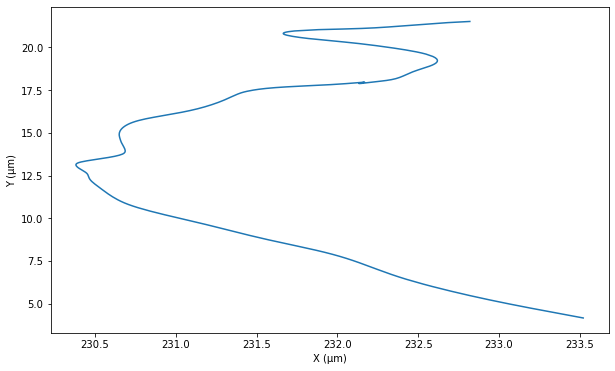

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(x_smooth,y_smooth)
plt.xlabel('X (µm)')
plt.ylabel('Y (µm)')
plt.show()

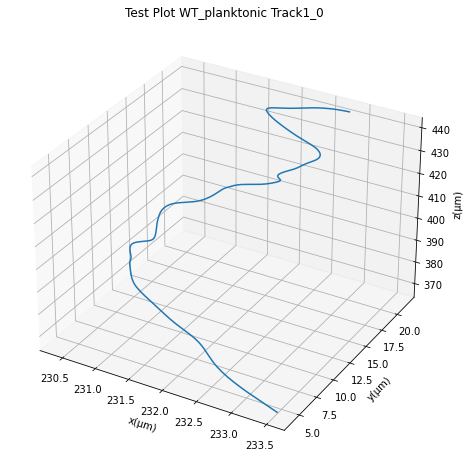

In [168]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.plot3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/MasterData/plots/track1_0_WT.png', dpi=300, bbox_inches='tight')

plt.show()

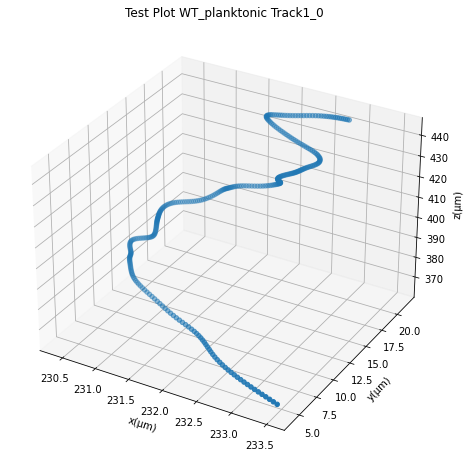

In [169]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.scatter3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')

plt.show()

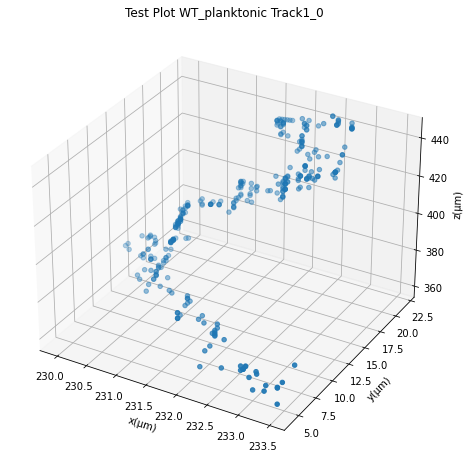

In [170]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.scatter3D(x, y, z)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')

plt.show()

In [171]:
v_arr = np.zeros(len(data)-1)

In [172]:
v_arr = np.zeros(len(data))
t_arr = np.zeros(len(data)-1)

for i in range(1,len(data)-1):
    #dt = 0.005
    t_next = time.iloc[i+1]
    x_next = x_smooth.iloc[i+1]
    y_next = y_smooth.iloc[i+1]
    z_next = z_smooth.iloc[i+1]
    
    t_prev = time.iloc[i-1]
    x_prev = x_smooth.iloc[i-1]
    y_prev = y_smooth.iloc[i-1]
    z_prev = z_smooth.iloc[i-1]
    
    # Calculate radial distance for next and previous points
 
    
    
    r_diff = np.sqrt((x_next-x_prev)**2+(y_next-y_prev)**2+(z_next-z_prev)**2)
    dt = t_next - t_prev
  
  
    #velocity at the current point using central difference
    v = r_diff/ (dt)

    v_arr[i] = v
    t_arr[i]= dt
    
    
   

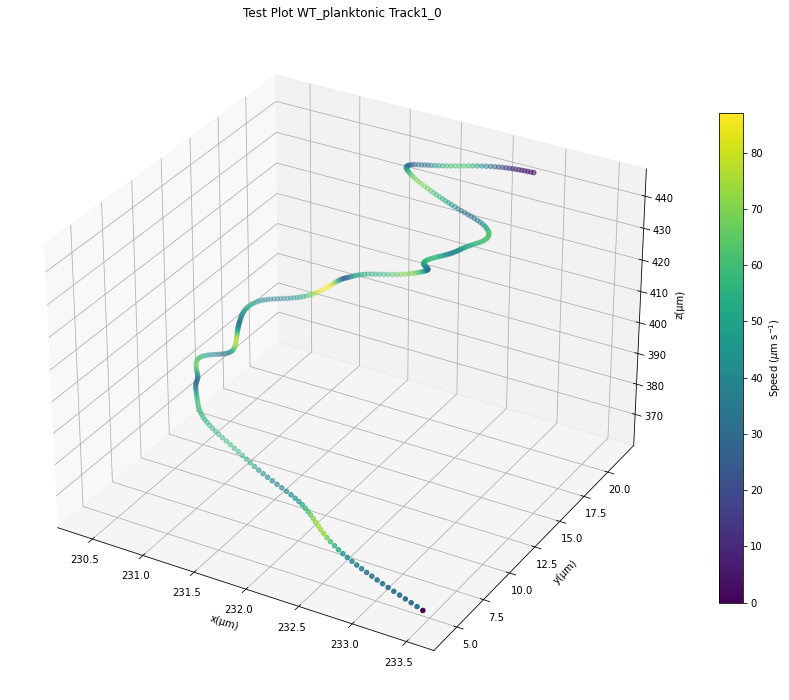

In [173]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x_smooth, y_smooth, z_smooth, c=v_arr, cmap='viridis', marker='o')

# Add color bar to show velocity scale
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label(r'Speed ($\mu$m s$^{-1}$)')
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
#plt.savefig('/Users/ethanbrentnall/documents/0_Mphys_Project/plots/track1_0_WT_withv', dpi=300, bbox_inches='tight')
plt.show()

In [174]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter3d(x=x_smooth,y=y_smooth,z=z_smooth, mode='markers', marker=dict(
        size=5,  color=v_arr,  colorscale='Viridis',  colorbar=dict(title=dict(text='Speed (µm s<sup>-1</sup>)',  
                font=dict(size=12)),titleside='right'),showscale=True,)))

# Add titles and labels
fig.update_layout(
    title='Test Plot WT_planktonic Track1_0',
    scene=dict(xaxis_title='x (µm)', yaxis_title='y (µm)', zaxis_title='z (µm)', aspectmode='cube'),
    width=800, height=800,)

# Show the plot
fig.show()


In [175]:
x_error_arr = np.zeros(len(data))
for i in range (len(data)):
    x_error = np.abs(x[i]-x_smooth[i])
    x_error_arr[i] = x_error
    

In [176]:
z_error_arr = np.zeros(len(data))
for i in range (len(data)):
    z_error = np.abs(z[i]-z_smooth[i])
    z_error_arr[i] = z_error
    

In [177]:
y_error_arr = np.zeros(len(data))
for i in range (len(data)):
    y_error = np.abs(y[i]-y_smooth[i])
    y_error_arr[i] = y_error
    

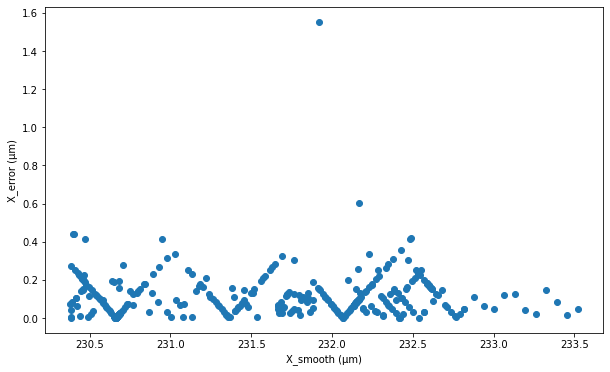

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(x_smooth, x_error_arr)
plt.xlabel('X_smooth (µm)')
plt.ylabel('X_error (µm)')
plt.show()

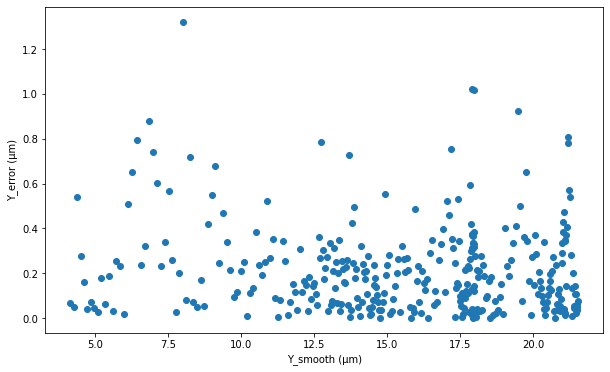

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(y_smooth, y_error_arr)
plt.xlabel('Y_smooth (µm)')
plt.ylabel('Y_error (µm)')
plt.show()

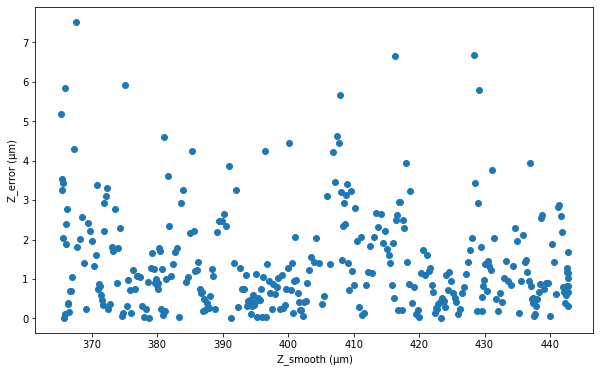

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(z_smooth, z_error_arr)
plt.xlabel('Z_smooth (µm)')
plt.ylabel('Z_error (µm)')
plt.show()

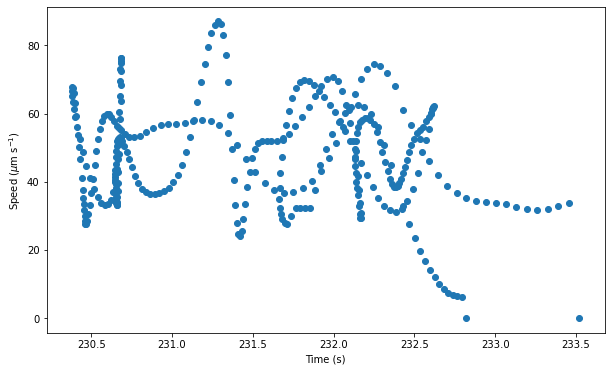

In [181]:
plt.figure(figsize=(10, 6))
plt.scatter(x_smooth, v_arr)
plt.xlabel('Time (s)')
plt.ylabel(r'Speed ($\mu$m s$^{-1}$)')
plt.show()

In [182]:
import os
def extract_track_name(file_path):
    # Extract the file name without the extension
    track_name = os.path.splitext(os.path.basename(file_path))[0]
    return track_name



In [183]:
track_name = extract_track_name(file_path)

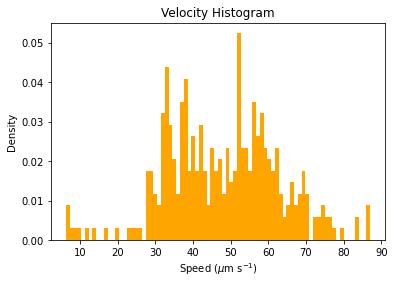

In [184]:

no_of_bins = 80

velocity = v_arr
# Take out 1st and last value as they are 0
velocity_filtered = v_arr[1:-1]

# Plot histogram for velocity
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange')
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.savefig(f'velo_plots/no_0_{track_name}.png', format='png')

# Show plot
plt.show()



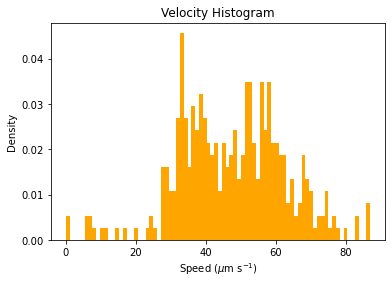

In [185]:
velocity = v_arr
#Showing hist with the 0 values

# Plot histogram for velocity
plt.hist(velocity, bins=no_of_bins, density=True, color='orange')
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.savefig(f'velo_plots/first_plot_{track_name}.png', format='png')
# Show plot
plt.show()

sigma = 0.38817684273631436 mean = 3.807233375426493


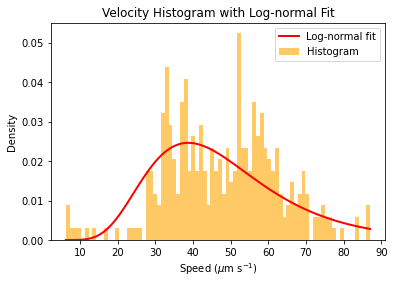

In [186]:

from scipy.stats import lognorm

velocity = v_arr

# Exclude the first and last point
velocity_filtered = v_arr[1:-1]

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(velocity_filtered, floc=0)

# Array of 100 values for velocity 
x = np.linspace(min(velocity_filtered), max(velocity_filtered), 100)

# Plot histogram for the filtered velocity
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange', alpha=0.6, label='Histogram')

# Create lognormal function from x 
pdf = lognorm.pdf(x, shape, loc, scale)

plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')

# Labels and title
plt.title('Velocity Histogram with Log-normal Fit')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.legend()


mu = np.log(scale)  # Mean of the function
s = shape  # Standard deviation of the function
c = 0
a = 1
#print mean and stddev
print('sigma =', s,'mean =', mu)
#plt.savefig(f'velo_plots/scipy_plot_{track_name}.png', format='png')
# Show plot
plt.show()



In [187]:
import numpy as np


# Create a histogram whihc I can extract values from
hist, bin_edges = np.histogram(v_arr, bins=no_of_bins, density=True)  # Adjust the number of bins as needed

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
density = hist
print("Bin Centers:", len(bin_centers))
print(len(density))

Bin Centers: 80
80


In [188]:
def fit_function(x,a,mu,sigma,c):  #x prefactor mean stddev const
    global args 
    args = fit_function.__code__.co_varnames
    return (a / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * sigma**2))+c  #lognormal func

In [189]:
guess = (a, mu , s, c ) #Initial guess values 

In [190]:
fit_function(1,*guess)

if len(args)-1 != len(guess):
    print('error, wrong number of guesses')
else:
    print('FITTING CAN GO AHEAD')
    print(len(args)-1, 'parameters fitting with following initial guesses')
    for i in range(len(guess)):
        print(args[i+1],"=", guess[i])

FITTING CAN GO AHEAD
4 parameters fitting with following initial guesses
a = 1
mu = 3.807233375426493
sigma = 0.38817684273631436
c = 0


[1.02068745e+00 3.88019850e+00 3.40184057e-01 2.61058767e-04]


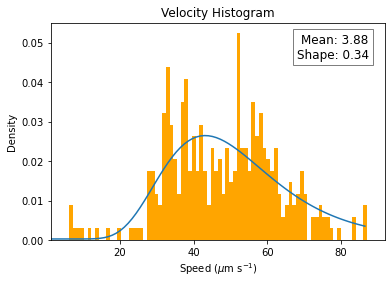

In [191]:
from scipy.optimize import curve_fit

para,covar=curve_fit(fit_function, bin_centers, density,  p0=guess)
print(para)
x_lognorm = bin_centers
y_lognorm = fit_function(x_lognorm, para[0],para[1],para[2],para[3])
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange')
plt.plot(x_lognorm,y_lognorm)
plt.xlim(min(velocity_filtered)-5, max(velocity_filtered)+5)
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.text(0.95, 0.95, f'Mean: {np.round(para[1],3)}\nShape: {np.round(para[2],3)}', 
         horizontalalignment='right', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig(f'velo_plots/my_fit_{track_name}.png', format='png')
plt.show()

# Positional change consectutive points 

In [197]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)

mags = np.linalg.norm(dir_vectors, axis = 1)
unit_dir = dir_vectors / mags[:, np.newaxis]

dot_products = [np.dot(unit_dir[i], unit_dir[i+1]) for i in range(len(unit_dir)-1)] #essentially all parallel

for dp in dot_products:
    if dp < 0.99:
        print(dp)

0.9868219052389324
0.9852404161345449


# Comparison over a larger scale 

In [198]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

k = 5

dir_vectors_LS = positions[k:] - positions[:-k]

mags_LS = np.linalg.norm(dir_vectors_LS, axis = 1)
unit_dir_LS = dir_vectors_LS / mags_LS[:, np.newaxis]


dot_products_LS = [np.dot(unit_dir_LS[i], unit_dir_LS[i+1]) for i in range(len(unit_dir_LS)-1)] #essentially all parallel

#for dp in dot_products_LS:
    #if dp < 0.99:
        #print(dp)


# Comparing ahead, issue it skips vectors and could skip events. Does a better job of identifying a difference of direction. 

In [218]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)

mags = np.linalg.norm(dir_vectors, axis = 1)
unit_dir = dir_vectors / mags[:, np.newaxis]
k = 5 #still taking vectors as line beween consecutive points, but no compare 5 ahead in unit vector list
dot_products = [np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir)-k)] #essentially all parallel

#for dp in dot_products:
    #if dp < 0.99:
        #print(dp)

# Rolling average method

In [214]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors_RA = np.diff(positions, axis = 0)

avrg_size = 5

RA_vectors = np.array([np.mean(dir_vectors_RA[i:i+avrg_size], axis = 0)
                      for i in range(len(dir_vectors_RA)- avrg_size + 1)])

mags = np.linalg.norm(RA_vectors, axis = 1)
unit_dir_RA = RA_vectors / mags[:, np.newaxis]

dot_products_RA = [np.dot(unit_dir_RA[i], unit_dir_RA[i+1]) for i in range(len(unit_dir_RA)-1)] #essentially all parallel



# Most effective way so far is this 


In [219]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)

mags = np.linalg.norm(dir_vectors, axis = 1)
unit_dir = dir_vectors / mags[:, np.newaxis]
k = 5 #still taking vectors as line beween consecutive points, but no compare 5 ahead in unit vector list
dot_products = [np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir)-k)] #essentially all parallel






## This obtains actual differences in the direction which is good, I am guessing thatwhen there is a re orientation event, this event will occur where the dot products are consecutivly closer to 1. 

In [227]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)

mags = np.linalg.norm(dir_vectors, axis = 1)
unit_dir = dir_vectors / mags[:, np.newaxis]
k = 5 #still taking vectors as line beween consecutive points, but no compare 5 ahead in unit vector list
dot_products = [np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir)-k)] #essentially all parallel



change_in_dir_threshold = 0.99
consecutive_low_values  = 3

low_sequences = []
current_sequence = []

for i in range(len(dot_products)):
    if dot_products[i] < change_in_dir_threshold:
        current_sequence.append(dot_products[i])
        
    else:
        if len(current_sequence) >= consecutive_low_values:
            low_sequences.append(current_sequence)
        current_sequence = []  # Reset for the next sequence

if len(current_sequence) >= consecutive_low_values:
    low_sequences.append(current_sequence)
    
print("Consecutive low dot product sequences:", len(low_sequences))


Consecutive low dot product sequences: 7
